# Import Libraries

In [1]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler

- This script applies PCA to reduce the dimensions of the California Housing dataset, followed by clustering using the MeanShift algorithm.
- It visualizes the clustering results on a geographical map using longitude and latitude coordinates and pca components, with clusters differentiated by color. The plot includes a color bar for cluster labels, providing a visual assessment of the spatial distribution of the clusters formed by MeanShift.

# Data Loading & Preprocessing

In [2]:
path = 'C:\\Users\\zcindemir\\Desktop\\Data Mining Project\\housing.csv'
housing = pd.read_csv(path)

housing['total_bedrooms'].fillna(housing['total_bedrooms'].median(), inplace=True)

encoder = OneHotEncoder()
ocean_proximity_encoded = encoder.fit_transform(housing[['ocean_proximity']]).toarray()
feature_names = encoder.get_feature_names_out(['ocean_proximity'])
ocean_proximity_df = pd.DataFrame(ocean_proximity_encoded, columns=feature_names)
housing_encoded = pd.concat([housing.drop('ocean_proximity', axis=1), ocean_proximity_df], axis=1)

scaler = StandardScaler()
housing_scaled = scaler.fit_transform(housing_encoded)

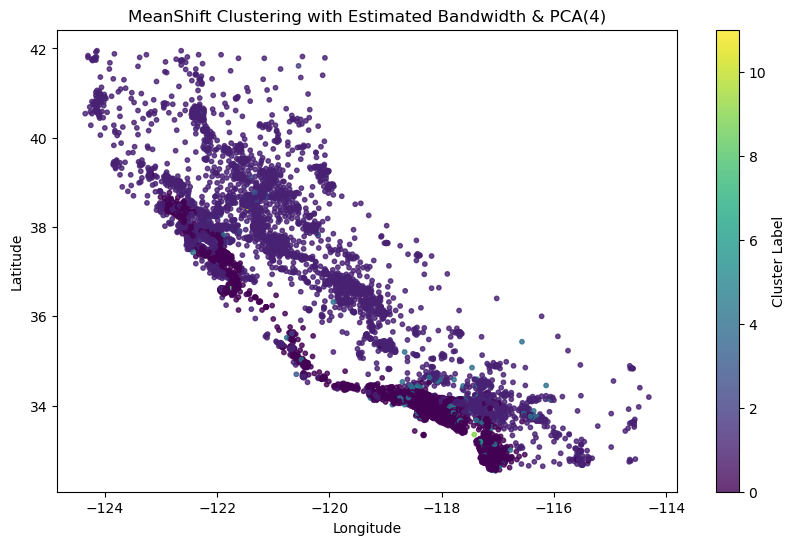

In [3]:
pca = PCA(n_components=4)
housing_pca = pca.fit_transform(housing_scaled)

bandwidth = estimate_bandwidth(housing_pca, quantile=0.2, n_samples=500)

mean_shift = MeanShift(bandwidth=bandwidth)
mean_shift.fit(housing_pca)

plt.figure(figsize=(10, 6))
plt.scatter(housing['longitude'], housing['latitude'], c=mean_shift.labels_, cmap='viridis', s=10, alpha=0.8)
plt.colorbar(label='Cluster Label')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('MeanShift Clustering with Estimated Bandwidth & PCA(4)')
plt.show()

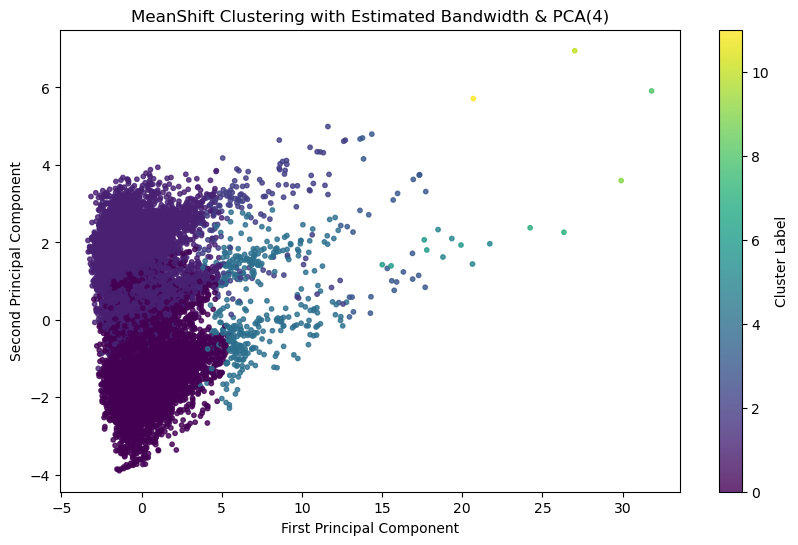

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(housing_pca[:, 0], housing_pca[:, 1], c=mean_shift.labels_, cmap='viridis', s=10, alpha=0.8)
plt.colorbar(label='Cluster Label')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('MeanShift Clustering with Estimated Bandwidth & PCA(4)')
plt.show()